In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import clear_output
from time import sleep
import os

In [2]:
train_data = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/Features Eng/facial-keypoints-detection/Data/training.csv')
test_data = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/Features Eng/facial-keypoints-detection/Data/test.csv')
lookid_data = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/Features Eng/facial-keypoints-detection/Data/IdLookupTable.csv')

In [4]:
train_data.head(2)

left_eye_center_x  ...                                              Image
0          66.033564  ...  238 236 237 238 240 240 239 241 241 243 240 23...
1          64.332936  ...  219 215 204 196 204 211 212 200 180 168 178 19...

[2 rows x 31 columns]

In [8]:
train_data.head().T

0  ...                                                  4
left_eye_center_x                                                    66.0336  ...                                            66.7253
left_eye_center_y                                                    39.0023  ...                                            39.6213
right_eye_center_x                                                    30.227  ...                                            32.2448
right_eye_center_y                                                   36.4217  ...                                             38.042
left_eye_inner_corner_x                                              59.5821  ...                                            58.5659
left_eye_inner_corner_y                                              39.6474  ...                                            39.6213
left_eye_outer_corner_x                                              73.1303  ...                                            72.5159
left_eye_outer_corner_y                                                39.97  ...                                            39.8845
right_eye_inner_corner_x                                             36.3566  ...                                            36.9824
right_eye_inner_corner_y                                             37.3894  ...                                            39.0949
right_eye_outer_corner_x                                             23.4529  ...                                            22.5061
right_eye_outer_corner_y                                             37.3894  ...                                            38.3052
left_eyebrow_inner_end_x                                             56.9533  ...                                            57.2496
left_eyebrow_inner_end_y                                             29.0336  ...                                            30.6722
left_eyebrow_outer_end_x                                             80.2271  ...                                            77.7629
left_eyebrow_outer_end_y                                             32.2281  ...                                            31.7372
right_eyebrow_inner_end_x                                            40.2276  ...                                            38.0354
right_eyebrow_inner_end_y                                            29.0023  ...                                            30.9354
right_eyebrow_outer_end_x                                            16.3564  ...                                            15.9259
right_eyebrow_outer_end_y                                            29.6475  ...                                            30.6722
nose_tip_x                                                           44.4206  ...                                            43.2995
nose_tip_y                                                           57.0668  ...                                            64.8895
mouth_left_corner_x                                                  61.1953  ...                                            60.6714
mouth_left_corner_y                                                  79.9702  ...                                            77.5232
mouth_right_corner_x                                                 28.6145  ...                                            31.1918
mouth_right_corner_y                                                  77.389  ...                                            76.9973
mouth_center_top_lip_x                                               43.3126  ...                                            44.9627
mouth_center_top_lip_y                                               72.9355  ...                                            73.7074
mouth_center_bottom_lip_x                                            43.1307  ...                                            44.2271
mouth_center_bottom_lip_y                                            84.4858  ...    

In [6]:
train_data.columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y', 'Image'],
      dtype='object')

In [9]:
train_data.isnull().any().value_counts()

True     28
False     3
dtype: int64

In [10]:
train_data.fillna(method = 'ffill',inplace = True)
#train_data.reset_index(drop = True,inplace = True)

In [11]:
train_data.isnull().any().value_counts()

False    31
dtype: int64

In [12]:
imag = []
for i in range(0,7049):
    img = train_data['Image'][i].split(' ')
    img = ['0' if x == '' else x for x in img]
    imag.append(img)
    

In [14]:
image_list = np.array(imag,dtype = 'float')
X_train = image_list.reshape(-1,96,96,1)

In [16]:
X_train.shape

(7049, 96, 96, 1)

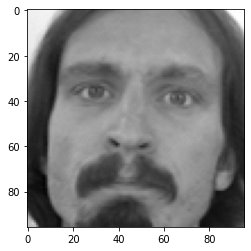

In [17]:
plt.imshow(X_train[0].reshape(96,96),cmap='gray')
plt.show()

In [19]:
train_data.iloc[0,:]

left_eye_center_x                                                      66.0336
left_eye_center_y                                                      39.0023
right_eye_center_x                                                      30.227
right_eye_center_y                                                     36.4217
left_eye_inner_corner_x                                                59.5821
left_eye_inner_corner_y                                                39.6474
left_eye_outer_corner_x                                                73.1303
left_eye_outer_corner_y                                                  39.97
right_eye_inner_corner_x                                               36.3566
right_eye_inner_corner_y                                               37.3894
right_eye_outer_corner_x                                               23.4529
right_eye_outer_corner_y                                               37.3894
left_eyebrow_inner_end_x                            

In [20]:
training = train_data.drop('Image',axis = 1)
y_train = []
for i in range(0,7049):
    y = training.iloc[i,:]
    if i == 0:
      print(y)
    y_train.append(y)
y_train = np.array(y_train,dtype = 'float')

left_eye_center_x            66.033564
left_eye_center_y            39.002274
right_eye_center_x           30.227008
right_eye_center_y           36.421678
left_eye_inner_corner_x      59.582075
left_eye_inner_corner_y      39.647423
left_eye_outer_corner_x      73.130346
left_eye_outer_corner_y      39.969997
right_eye_inner_corner_x     36.356571
right_eye_inner_corner_y     37.389402
right_eye_outer_corner_x     23.452872
right_eye_outer_corner_y     37.389402
left_eyebrow_inner_end_x     56.953263
left_eyebrow_inner_end_y     29.033648
left_eyebrow_outer_end_x     80.227128
left_eyebrow_outer_end_y     32.228138
right_eyebrow_inner_end_x    40.227609
right_eyebrow_inner_end_y    29.002322
right_eyebrow_outer_end_x    16.356379
right_eyebrow_outer_end_y    29.647471
nose_tip_x                   44.420571
nose_tip_y                   57.066803
mouth_left_corner_x          61.195308
mouth_left_corner_y          79.970165
mouth_right_corner_x         28.614496
mouth_right_corner_y     

In [24]:
X_train.shape,y_train.shape

((7049, 96, 96, 1), (7049, 30))

In [25]:
from keras.layers import Conv2D,Dropout,Dense,Flatten
from keras.models import Sequential

model = Sequential([Flatten(input_shape=(96,96)),
                         Dense(128, activation="relu"),
                         Dropout(0.1),
                         Dense(64, activation="relu"),
                         Dense(30)
                         ])

In [26]:
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D,MaxPool2D, ZeroPadding2D

In [27]:
model = Sequential()

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape=(96,96,1)))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
# model.add(BatchNormalization())
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 32)        288       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 96, 96, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 32)        9216      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 32)       

In [28]:
model.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['mae'])

In [29]:
model.fit(X_train,y_train,epochs = 50,batch_size = 256,validation_split = 0.2)

Epoch 1/50
23/23 [==============================] - 14s 618ms/step - loss: 362.4867 - mae: 12.1881 - val_loss: 423.2495 - val_mae: 18.9628
Epoch 2/50
23/23 [==============================] - 12s 534ms/step - loss: 32.2588 - mae: 4.4228 - val_loss: 16.5894 - val_mae: 3.0215
Epoch 3/50
23/23 [==============================] - 12s 533ms/step - loss: 26.2323 - mae: 3.9570 - val_loss: 34.2927 - val_mae: 4.9196
Epoch 4/50
23/23 [==============================] - 12s 533ms/step - loss: 23.8584 - mae: 3.7518 - val_loss: 30.6397 - val_mae: 4.6615
Epoch 5/50
23/23 [==============================] - 12s 531ms/step - loss: 22.6983 - mae: 3.6554 - val_loss: 35.5435 - val_mae: 5.1239
Epoch 6/50
23/23 [==============================] - 12s 533ms/step - loss: 21.1798 - mae: 3.5169 - val_loss: 43.5657 - val_mae: 5.8636
Epoch 7/50
23/23 [==============================] - 12s 533ms/step - loss: 20.4056 - mae: 3.4515 - val_loss: 22.6990 - val_mae: 4.0706
Epoch 8/50
23/23 [==============================] -

In [30]:
#preparing test data
timag = []
for i in range(0,1783):
    timg = test_data['Image'][i].split(' ')
    timg = ['0' if x == '' else x for x in timg]
    
    timag.append(timg)

In [31]:
timage_list = np.array(timag,dtype = 'float')
X_test = timage_list.reshape(-1,96,96,1) 

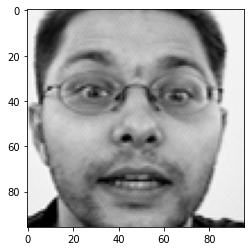

In [32]:
plt.imshow(X_test[0].reshape(96,96),cmap = 'gray')
plt.show()

In [43]:
X_test.shape

(1783, 96, 96, 1)

In [33]:
pred = model.predict(X_test)

In [44]:
pred.shape

(1783, 30)

In [51]:
pred[0]

array([63.894897, 35.777275, 27.398172, 34.5978  , 56.875946, 34.37859 ,
       70.105   , 34.44368 , 33.305252, 36.007065, 20.410585, 36.76645 ,
       53.128326, 26.06078 , 76.07067 , 25.964918, 35.63894 , 26.703056,
       12.853732, 29.852585, 45.95553 , 52.46898 , 62.64268 , 71.7273  ,
       31.771976, 73.23576 , 46.492405, 66.7585  , 45.14977 , 80.67158 ],
      dtype=float32)

In [47]:
lookid_data.head()

RowId  ImageId              FeatureName  Location
0      1        1        left_eye_center_x       NaN
1      2        1        left_eye_center_y       NaN
2      3        1       right_eye_center_x       NaN
3      4        1       right_eye_center_y       NaN
4      5        1  left_eye_inner_corner_x       NaN

In [35]:
lookid_list = list(lookid_data['FeatureName'])
imageID = list(lookid_data['ImageId']-1)
pre_list = list(pred)

In [36]:
rowid = lookid_data['RowId']
rowid=list(rowid)

In [37]:
feature = []
for f in list(lookid_data['FeatureName']):
    feature.append(lookid_list.index(f))

In [50]:
feature[2]

2

In [53]:
preded = []
for x,y in zip(imageID,feature):
    preded.append(pre_list[x][y])

In [54]:
preded[0]

63.894897

In [39]:
rowid = pd.Series(rowid,name = 'RowId')

In [40]:
loc = pd.Series(preded,name = 'Location')

In [41]:
submission = pd.concat([rowid,loc],axis = 1)

In [46]:
submission.shape

(27124, 2)

In [42]:
submission.to_csv('/content/drive/My Drive/MY ML JOURNEY/Features Eng/facial-keypoints-detection/face_key_detection_submission.csv',index = False)